In [45]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import cv2
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import load_model

In [46]:
# Define dataset directories
train_dir = "Teeth_DataSet/Teeth_Dataset/Training"
val_dir = "Teeth_DataSet/Teeth_Dataset/Validation"
test_dir = "Teeth_DataSet/Teeth_Dataset/Testing"

# Define image parameters
IMG_SIZE = (128, 128)
BATCH_SIZE = 32

In [47]:
import os
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0, 
    rotation_range=20, 
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
val_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)
# List all class folders in the directories
all_train_classes = os.listdir(train_dir)
all_val_classes = os.listdir(val_dir)
all_test_classes = os.listdir(test_dir)

# Define classes to exclude
excluded_classes = ["out", "output","outputs","output_image.jpg"]  # Replace with actual folder names

# Filter out unwanted classes
selected_train_classes = [cls for cls in all_train_classes if cls not in excluded_classes]
selected_val_classes = [cls for cls in all_val_classes if cls not in excluded_classes]
selected_test_classes = [cls for cls in all_test_classes if cls not in excluded_classes]

# Load Training Data (excluding unwanted classes)
train_data = train_datagen.flow_from_directory(
    train_dir, 
    target_size=IMG_SIZE, 
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    classes=selected_train_classes  # Only load selected classes
)

# Load Validation Data (excluding unwanted classes)
val_data = val_datagen.flow_from_directory(
    val_dir, 
    target_size=IMG_SIZE, 
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    classes=selected_val_classes
)

# Load Test Data (excluding unwanted classes)
test_data = test_datagen.flow_from_directory(
    test_dir, 
    target_size=IMG_SIZE, 
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    classes=selected_test_classes
)

# Class Names
class_names = list(train_data.class_indices.keys())
print("Loaded Classes:", class_names)

Found 3087 images belonging to 7 classes.
Found 1028 images belonging to 7 classes.
Found 1028 images belonging to 7 classes.
Loaded Classes: ['CaS', 'CoS', 'Gum', 'MC', 'OC', 'OLP', 'OT']


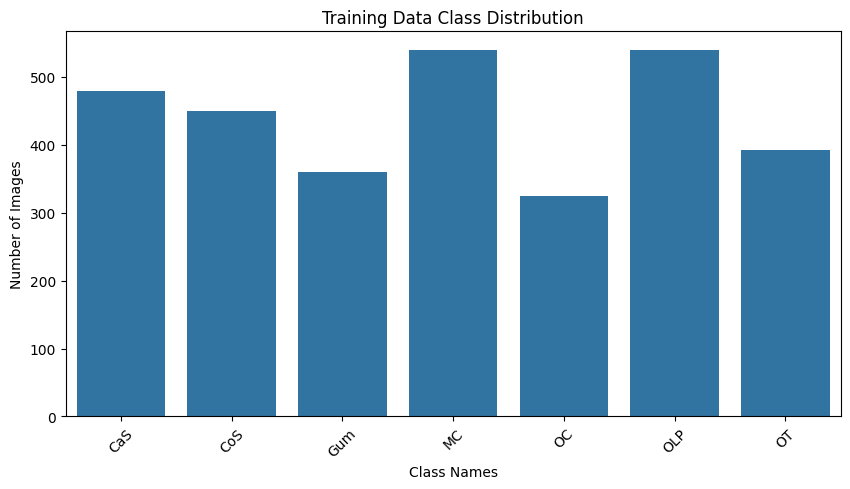

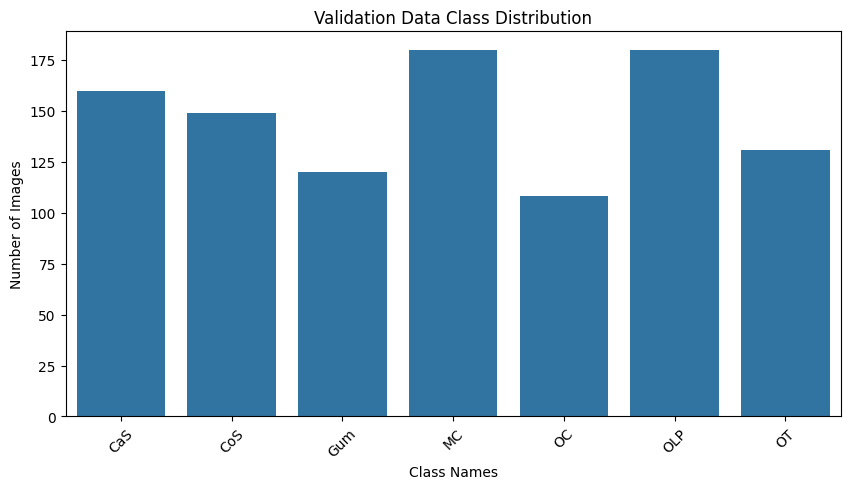

In [48]:
# Visualize Class Distribution
def plot_class_distribution(dataset, title):
    class_counts = dataset.class_indices
    counts = [dataset.classes.tolist().count(i) for i in range(len(class_counts))]
    
    plt.figure(figsize=(10, 5))
    sns.barplot(x=list(class_counts.keys()), y=counts)
    plt.xticks(rotation=45)
    plt.title(title)
    plt.xlabel("Class Names")
    plt.ylabel("Number of Images")
    plt.show()

plot_class_distribution(train_data, "Training Data Class Distribution")
plot_class_distribution(val_data, "Validation Data Class Distribution")

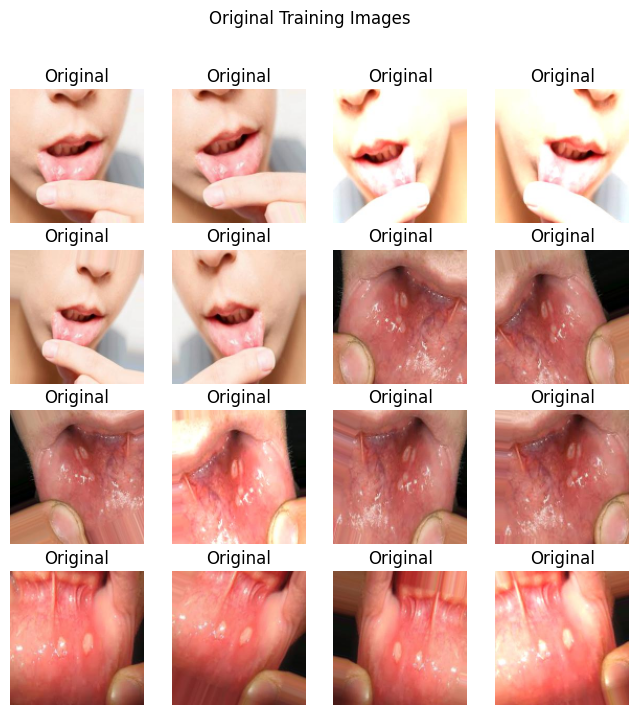

In [49]:
# Display original images
def display_original_images(dataset, title):
    fig, axes = plt.subplots(4, 4, figsize=(8, 8))
    axes = axes.ravel()
    
    for i in range(16):
        img_path = dataset.filepaths[i]
        original_img = cv2.imread(img_path)
        original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
        original_img = cv2.resize(original_img, IMG_SIZE)
        
        axes[i].imshow(original_img)
        axes[i].set_title("Original")
        axes[i].axis('off')
    
    plt.suptitle(title)
    plt.show()

display_original_images(train_data, "Original Training Images")

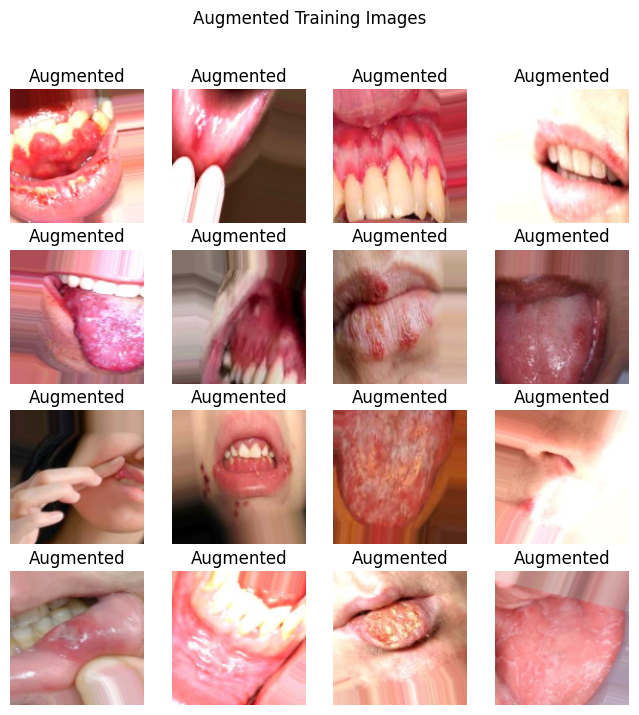

In [50]:
# Display augmented images
def display_augmented_images(dataset, title):
    images, labels = next(dataset)
    fig, axes = plt.subplots(4, 4, figsize=(8, 8))
    axes = axes.ravel()
    
    for i in range(16):
        axes[i].imshow(images[i])
        axes[i].set_title("Augmented")
        axes[i].axis('off')
    
    plt.suptitle(title)
    plt.show()

display_augmented_images(train_data, "Augmented Training Images")

In [51]:
model = keras.Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(2,2),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(class_names), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display Model Summary
model.summary()

C:\Users\Dodooz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,543 (12.61 MB)

 Trainable params: 3,305,543 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [52]:
# Train the model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=100
)

Epoch 1/100


C:\Users\Dodooz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


97/97 ━━━━━━━━━━━━━━━━━━━━ 22s 210ms/step - accuracy: 0.1677 - loss: 1.9747 - val_accuracy: 0.2558 - val_loss: 1.8756
Epoch 2/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 20s 199ms/step - accuracy: 0.2186 - loss: 1.8787 - val_accuracy: 0.3385 - val_loss: 1.7891
Epoch 3/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 21s 213ms/step - accuracy: 0.2998 - loss: 1.7966 - val_accuracy: 0.3726 - val_loss: 1.6292
Epoch 4/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 22s 217ms/step - accuracy: 0.3179 - loss: 1.7087 - val_accuracy: 0.4047 - val_loss: 1.5601
Epoch 5/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 21s 205ms/step - accuracy: 0.3302 - loss: 1.6781 - val_accuracy: 0.4008 - val_loss: 1.5813
Epoch 6/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 21s 206ms/step - accuracy: 0.3571 - loss: 1.6392 - val_accuracy: 0.4767 - val_loss: 1.4060
Epoch 7/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 21s 205ms/step - accuracy: 0.3913 - loss: 1.6073 - val_accuracy: 0.5088 - val_loss: 1.3806
Epoch 8/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 21s 214ms/step - accuracy: 0.4036 - loss: 1.5422 - val_accuracy

In [53]:
# Evaluate on test data
test_loss, test_acc = model.evaluate(test_data)
print(f"Test Accuracy: {test_acc:.2f}")

33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.9710 - loss: 0.0935
Test Accuracy: 0.97


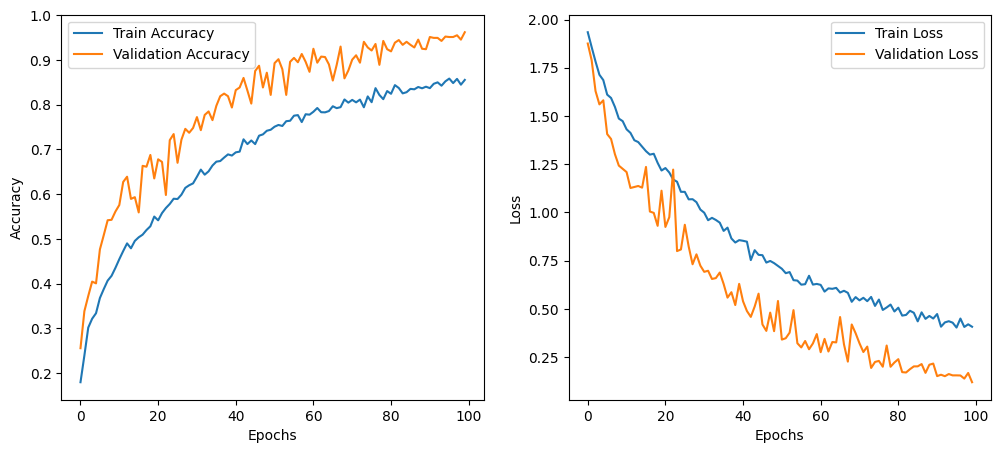

In [54]:
# Plot accuracy & loss
def plot_metrics(history):
    plt.figure(figsize=(12, 5))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.show()

# Show performance
plot_metrics(history)

In [55]:
# Save the trained model
model.save("teeth_classification_model.h5")
print("Model saved successfully!")

# Load the saved model for future use
loaded_model = load_model("teeth_classification_model.h5")
print("Model loaded successfully!")

Model saved successfully!
Model loaded successfully!
